In [ ]:
!pip install --user -r requirements.txt

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import sklearn.metrics as metrics

# fa i modo che i numeri siano più leggibili.
np.set_printoptions(precision=3, suppress=True)

train_file_path =  "./train.csv"
test_file_path = "./test.csv"

train_df = pd.read_csv(train_file_path)
#train_df.dtypes
test_df = pd.read_csv(test_file_path)
#test_df.dtypes

Eliminazione di valori Nan per il train

In [25]:
# Sostituisco ad ogni stringa vuota il valore 'NaN'
train_df.replace("", np.nan, inplace=True)
train_df.replace(" ", np.nan, inplace=True)
train_df.replace("?", np.nan, inplace=True)
train_df.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10
1,0,50.0,0,1548,0,30,1,211000.0,0.8,138,1,0,108
2,0,58.0,1,133,0,60,1,219000.0,1.0,141,1,0,83
3,1,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
4,1,80.0,1,553,0,20,1,140000.0,4.4,133,1,0,41


Controllo se ci sono effettivamente valori Nan nel dataset train

In [26]:
train_df.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

Eliminazione di valori Nan per il test

In [27]:
# Sostituisco ad ogni stringa vuota il valore 'NaN'
test_df.replace("", np.nan, inplace=True)
test_df.replace(" ", np.nan, inplace=True)
test_df.replace("?", np.nan, inplace=True)
test_df.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20
1,0,50.0,0,185,0,30,0,266000.0,0.7,141,1,1,112
2,1,80.0,0,776,1,38,1,192000.0,1.3,135,0,0,130
3,0,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174
4,0,60.0,1,737,0,60,1,210000.0,1.5,135,1,1,95


Ricontrollo se ci sono effettivamente valori Nan nel dataset test

In [28]:
test_df.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

Eliminazione valori Nan

In [29]:
# Procediamo con l'eliminazione dei dati non validi (NaN)
test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

Conversione stringhe a float train.csv

In [30]:

#tutte le colonne che contengono stringhe devono essere trasformate in colonne che contengono interi 
for elemento in train_df:
  if elemento=="DEATH_EVENT	" or elemento=="age" or elemento=="anaemia" or elemento=="creatinine_phosphokinase" or elemento == "diabetes" or elemento == "ejection_fraction" or elemento == "high_blood_pressure " or elemento == "platelets" or elemento == "serum_creatinine" or elemento == "serum_sodium" or elemento == "sex"or elemento== "smoking" or elemento== "time" :
   train_df[elemento] = train_df[elemento].astype('float')
  else:
   train_df[elemento] = (pd.Categorical(train_df[elemento])).codes.astype('float')

# mostro il dataset dopo l'operazione
train_df.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.0,75.0,1.0,81.0,0.0,38.0,1.0,368000.0,4.0,131.0,1.0,1.0,10.0
1,0.0,50.0,0.0,1548.0,0.0,30.0,1.0,211000.0,0.8,138.0,1.0,0.0,108.0
2,0.0,58.0,1.0,133.0,0.0,60.0,1.0,219000.0,1.0,141.0,1.0,0.0,83.0
3,1.0,75.0,0.0,582.0,0.0,20.0,1.0,265000.0,1.9,130.0,1.0,0.0,4.0
4,1.0,80.0,1.0,553.0,0.0,20.0,1.0,140000.0,4.4,133.0,1.0,0.0,41.0


Preparazione modello

In [31]:
features =['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
X = train_df[features]
Y = train_df['DEATH_EVENT']
X_test = test_df[features]
Y_test =test_df['DEATH_EVENT']

# Specify Model : viene utilizzato RandomForestCLaasifier
#La foresta casuale, come suggerisce il nome, 
#è costituita da un gran numero di singoli alberi decisionali che operano come un insieme(differentemente per il DecisionTreeClassifier che opera su un albero di decisione).
#Ogni singolo albero nella foresta casuale genera una previsione di classe basandosi sui suoi attributi ed esprime un voto per quella classe
# e la classe con il maggior numero di voti diventa la previsione del nostro modello
#Mentre alcuni alberi potrebbero essere sbagliati, molti altri alberi avranno ragione, quindi come gruppo gli alberi sono in grado di muoversi nella direzione corretta. 
#Le previsioni (e quindi gli errori) fatte dai singoli alberi devono avere basse correlazioni tra loro.

model = RandomForestClassifier(random_state=1)
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Addestramento

In [32]:
train_predictions = model.predict(X)
train_acc = metrics.accuracy_score(Y,train_predictions)
print('Accuracy train: %s'  % train_acc)

Accuracy train: 1.0


Test

In [33]:
test_predictions = model.predict(X_test)
test_acc=metrics.accuracy_score(Y_test,test_predictions)
print('Accuracy test: %s'  % test_acc)

Accuracy test: 0.8541666666666666


Creazione confusion matrix

In [34]:
conf_matr = confusion_matrix(Y_test, test_predictions, normalize=None)
# Stampa della confusion matrix
print(conf_matr)

[[29  2]
 [ 5 12]]


Plot confusion matrix

[[29  2]
 [ 5 12]]


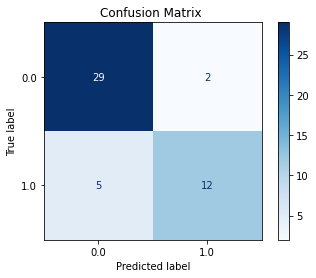

In [35]:
disp = plot_confusion_matrix(model, X_test, Y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix ")



print(disp.confusion_matrix)
plt.show()

Conclusioni : non è possibile addestrare un modello che predice in maniera  corretta poichè il dataset contiene troppi pochi esempi. Inolre, mentre nell'accuracy train si produce il 100%, nell'operazione di test l'accuracy varia tra 81%-91% 